In [2]:
from sqlalchemy import create_engine
engine = create_engine("postgresql://localhost:5432/sql_challenge")
connection = engine.connect()
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

In [3]:
dframe = pd.read_sql("SELECT * FROM titles t JOIN employees e ON t.title_id = e.emp_title_id JOIN salaries s ON s.emp_no = e.emp_no", engine)
dframe

,title_id,title,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,emp_no,salary
0,e0002,Engineer,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,57444,48973
1,e0003,Senior Engineer,13616,e0003,8/30/1961,Perry,Lorho,F,8/3/1991,13616,40000
2,e0004,Technique Leader,240129,e0004,8/11/1952,Roddy,Karnin,M,5/29/1985,240129,43548
3,s0001,Staff,427958,s0001,5/3/1957,Feixiong,Poujol,F,5/11/1985,427958,63377
4,e0003,Senior Engineer,35916,e0003,8/15/1953,Wonhee,Talmon,F,3/20/1985,35916,40000
...,...,...,...,...,...,...,...,...,...,...,...
300019,s0001,Staff,222402,s0001,3/3/1955,Jaana,Klyachko,F,1/11/1991,222402,40000
300020,e0004,Technique Leader,70921,e0004,8/30/1957,Martijn,Bernardeschi,F,4/28/1991,70921,40000
300021,e0003,Senior Engineer,275129,e0003,7/25/1958,Fay,Perz,M,12/19/1988,275129,59703
300022,e0003,Senior Engineer,202478,e0003,11/16/1956,Xiaoheng,Michaels,M,7/27/1991,202478,48038


In [4]:
dframe.dtypes

title_id        object
title           object
emp_no           int64
emp_title_id    object
birth_date      object
first_name      object
last_name       object
sex             object
hire_date       object
emp_no           int64
salary           int64
dtype: object

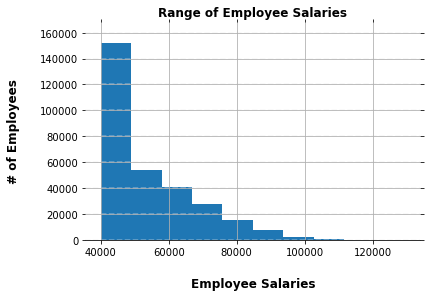

In [18]:
ax = dframe.hist(column='salary')

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Range of Employee Salaries", weight='bold', size=12)

    # Set x-axis label
    x.set_xlabel("Employee Salaries", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("# of Employees", labelpad=20, weight='bold', size=12)


In [23]:
avg_sal = dframe.groupby('title')['salary'].mean()

In [24]:
avg_sal

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

Text(0.5, 1.0, 'Avg Salary by Job Title')

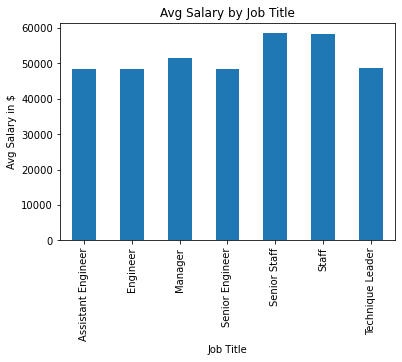

In [30]:
sal = avg_sal.plot.bar()
sal.set_xlabel("Job Title")
sal.set_ylabel("Avg Salary in $")
sal.set_title("Avg Salary by Job Title")